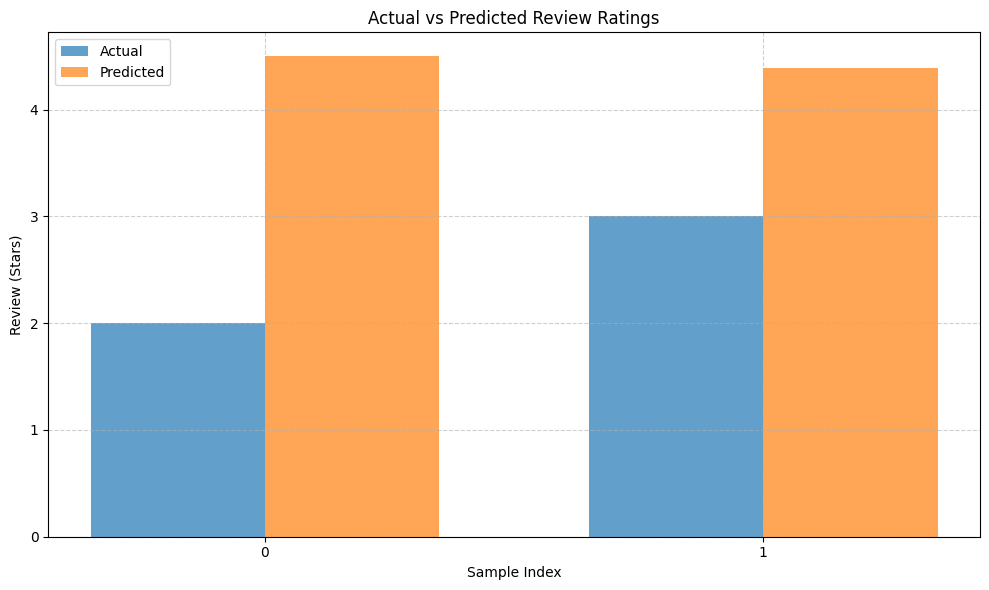

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
# Reload and clean the dataset
df = pd.read_csv('Book1.csv')

# Drop irrelevant and mostly empty columns
df = df.drop(columns=[
    'Unnamed: 0', 'NO.', 'TITLE', 'COMMENTS',
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'
])

# Drop fully empty rows
df = df.dropna(how='all')

# Convert REVIEW from '5 Stars' to numeric
df['REVIEW'] = df['REVIEW'].str.extract(r'(\d)').astype(float)

# Rename columns
df = df.rename(columns={'YEAR': 'Year', 'STARRING ACTORS': 'Actors', 'DIRECTOR': 'Director'})

# Drop rows with missing REVIEW as it's the target
df = df.dropna(subset=['REVIEW'])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Define features and target
X = df_imputed.drop('REVIEW', axis=1)
y = df_imputed['REVIEW']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use a higher test size to ensure at least a few samples
test_size = 0.4 if len(df) < 10 else 0.2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2, df_encoded.columns.tolist()  # Also return column names for prediction step later
import matplotlib.pyplot as plt

# Create a bar chart comparing actual vs predicted values
plt.figure(figsize=(10, 6))
indices = np.arange(len(y_test))

# Bar width and positioning
bar_width = 0.35
plt.bar(indices, y_test.values, bar_width, label='Actual', alpha=0.7)
plt.bar(indices + bar_width, y_pred, bar_width, label='Predicted', alpha=0.7)

# Labels and formatting
plt.xlabel('Sample Index')
plt.ylabel('Review (Stars)')
plt.title('Actual vs Predicted Review Ratings')
plt.xticks(indices + bar_width / 2, labels=[f"{i}" for i in range(len(y_test))])
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()